### 워드클라우드 및 시각화...
- 일단은 워드 클라우드부터 만들자...

In [1]:
# 필요한 라이브러리
import pandas as pd

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform     # 폰트를 지정하기 위함
import koreanize_matplotlib     # 폰트가 깨질수 있음
import numpy as np
from PIL import Image # 이건 대문자로 적어야 인식됨

In [2]:
# 데이터 불러오기
data_rank_df = pd.read_csv('./company_rank_top500.csv', encoding='utf-8')
data_bene_df = pd.read_csv('./company_bene_df.csv', encoding='utf-8')

In [3]:
data_rank_df.head()

,기업 이름,이동 링크,총 만족도,평균 임금
0,(주)팀엘리시움,/companies/329950/info/%ED%8C%80%EC%97%98%EB%A...,4.8,"3,630"
1,(주)코드잇,/companies/343681/info/%EC%BD%94%EB%93%9C%EC%9...,4.8,"4,901"
2,(주)하얀마인드,/companies/353033/info/%ED%95%98%EC%96%80%EB%A...,4.8,"5,133"
3,(주)헥톤프로젝트,/companies/338878/info/%ED%97%A5%ED%86%A4%ED%9...,4.6,"5,102"
4,세이지(주),/companies/351150/info/%EC%84%B8%EC%9D%B4%EC%A...,4.6,0


In [4]:
data_bene_df.head()

,기업 이름,복지 카테고리,복지 혜택
0,NaN,NaN,NaN
1,'(주)코드잇'의 복지,"의료/건강, 지원 제도, 교통/출퇴근, 교육/자기계발","체력단련비 지원, 웰컴키트 지급, 자사 제품 직원 할인, 자율 및 탄력 근무 제도,..."
2,'(주)하얀마인드'의 복지,"교통/출퇴근, 급여/보상, 교육/자기계발","재택 근무제도, 주차장 및 주차비 지원, 유류비 지원, 자율 및 탄력 근무 제도, ..."
3,'(주)헥톤프로젝트'의 복지,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 체력단련비 지원, 주택 지원 대출, 경조사 지원금,..."
4,기업 추천 복지,"세이지(주)의 특별한 복지, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연...","자기계발비 120만원 지원🏌️‍♀️, 동호회 비용 180만원 지원🧗‍♀️, 50만원..."


In [5]:
data_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기업 이름   500 non-null    object 
 1   이동 링크   500 non-null    object 
 2   총 만족도   500 non-null    float64
 3   평균 임금   500 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


In [6]:
data_bene_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기업 이름    425 non-null    object
 1   복지 카테고리  425 non-null    object
 2   복지 혜택    425 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


In [7]:
# 평균 임금부터 데이터 타입 바꾸기
mean_wage = data_rank_df['평균 임금'].copy()
for i in range(len(mean_wage)):
    mean_wage[i] = mean_wage[i].replace(',','')
mean_wage = mean_wage.astype('int64')
data_rank_df['평균 임금'] = mean_wage
data_rank_df = data_rank_df.rename(columns={'평균 임금':'평균 임금 (만원)'})
data_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기업 이름       500 non-null    object 
 1   이동 링크       500 non-null    object 
 2   총 만족도       500 non-null    float64
 3   평균 임금 (만원)  500 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [8]:
# 기업이름, 이동링크 빼고 두 데이터 프레임 합치기
bene_df = data_bene_df.drop(columns=['기업 이름'])
rank_df = data_rank_df.drop(columns=['이동 링크'])

In [9]:
data_df = pd.concat([rank_df, bene_df], axis=1)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기업 이름       500 non-null    object 
 1   총 만족도       500 non-null    float64
 2   평균 임금 (만원)  500 non-null    int64  
 3   복지 카테고리     425 non-null    object 
 4   복지 혜택       425 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [11]:
data_df.head()

,기업 이름,총 만족도,평균 임금 (만원),복지 카테고리,복지 혜택
0,(주)팀엘리시움,4.8,3630,NaN,NaN
1,(주)코드잇,4.8,4901,"의료/건강, 지원 제도, 교통/출퇴근, 교육/자기계발","체력단련비 지원, 웰컴키트 지급, 자사 제품 직원 할인, 자율 및 탄력 근무 제도,..."
2,(주)하얀마인드,4.8,5133,"교통/출퇴근, 급여/보상, 교육/자기계발","재택 근무제도, 주차장 및 주차비 지원, 유류비 지원, 자율 및 탄력 근무 제도, ..."
3,(주)헥톤프로젝트,4.6,5102,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 체력단련비 지원, 주택 지원 대출, 경조사 지원금,..."
4,세이지(주),4.6,0,"세이지(주)의 특별한 복지, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연...","자기계발비 120만원 지원🏌️‍♀️, 동호회 비용 180만원 지원🧗‍♀️, 50만원..."


In [12]:
data_df.index = data_df.index + 1
data_df.tail()

,기업 이름,총 만족도,평균 임금 (만원),복지 카테고리,복지 혜택
496,(주)엘지씨엔에스,3.2,6107,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 상해/실손 보험 지원, 의료비 지원 (본인,가족),..."
497,(주)크라우드웍스,3.2,4451,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","의료비 지원 (본인,가족), 건강검진 지원 (본인/배우자), 상해/실손 보험 지원,..."
498,(주)티맥스티베로,3.2,5343,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 체력단련비 지원, 의료비 지원 (본인,가족), 사내..."
499,바나플(유),3.2,4302,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경","건강검진 지원 (본인/배우자), 명절 선물 및 귀향비 지원, 자사 제품 직원 할인,..."
500,엔에이치엔클라우드(주),3.2,5707,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 의료비 지원 (본인,가족), 체력단련비 지원, 상해..."


In [21]:
# 500개 기업의 복지 카테고리와 혜택을 워드 클라우드로 나타내기
# 먼저 텍스트 형식으로 나타내기

# 결측치를 제거하고 합치면 text 만들 수 있지 않을까?
category_df = data_df['복지 카테고리'].dropna()
category_list = category_df.to_list()
category = ', '.join(category_list)

benefit_df = data_df['복지 혜택'].dropna()
benefit_list = benefit_df.to_list()
benefit = ', '.join(benefit_list)

In [22]:
category

'의료/건강, 지원 제도, 교통/출퇴근, 교육/자기계발, 교통/출퇴근, 급여/보상, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 세이지(주)의 특별한 복지, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 의료/건강, 교통/출퇴근, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, (주)핫셀러의 특별한 복지, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 지원 제도, 교통/출퇴근, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, (주)센드버드코리아의 특별한 복지, 의료/건강, 지원 제도, 교통/출퇴근, 연차/휴가, 의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발, 의료/건강, 지원 제도, 교통/출퇴근

In [45]:
# category, benefit
# 함수를 만들자

def create_wordcloud(text, name, title, stopwords):
    okt = Okt()     # 객체 생성

    # 형태소 분석
    sentens_tag = []
    sentens_tag = okt.pos(text)
    noun_obj_list = []
    
    # tag가 명사, 형용사,  영단어들만 noun_obj_list에 저장
    for word, tag in sentens_tag:
        if tag in ['Noun', 'Adjective', 'Alpha']:
            noun_obj_list.append(word)
            
    # 가장 많이 나온 단어부터 30개 저장
    counts = Counter(noun_obj_list)
    tags = counts.most_common(30)
    print(tags)
    print()
    
    # 제외? 설정?
    tag_dict = dict(tags)
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    print()
    
    # 한글을 분석하기 위해 font를 한글로 지정.
    if platform.system() == 'Windows':
        path = r'C:\Users\PC\Desktop\AI_빅데이터 전문가 양성과정 6기\KDT6\font\malgun.ttf'

    img_mask = np.array(Image.open('./cloud.png'))
    wc = WordCloud(font_path=path, width=40, height=400,
                background_color='white', max_font_size=200,
                repeat=True, colormap='plasma', mask=img_mask)
    cloud = wc.generate_from_frequencies(tag_dict)

    # 생성된 WordColud를 text.jpg로 저장
    cloud.to_file(f'{name}.jpg')
    plt.figure(figsize=(10,8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

[('교통', 408), ('출퇴근', 408), ('지원', 398), ('제도', 398), ('연차', 386), ('휴가', 386), ('급여', 385), ('보상', 385), ('근무', 383), ('환경', 383), ('의료', 375), ('건강', 375), ('교육', 359), ('자기계발', 359), ('특별한', 31), ('복지', 31), ('주', 28), ('의', 8), ('코리아', 2), ('텔레콤', 2), ('세이지', 1), ('핫', 1), ('셀러', 1), ('드', 1), ('버드', 1), ('트', 1), ('레드', 1), ('링스', 1), ('팀', 1), ('스파르타', 1)]

{'교통': 408, '출퇴근': 408, '연차': 386, '휴가': 386, '급여': 385, '보상': 385, '근무': 383, '환경': 383, '의료': 375, '건강': 375, '교육': 359, '자기계발': 359, '주': 28, '의': 8, '코리아': 2, '텔레콤': 2, '세이지': 1, '핫': 1, '셀러': 1, '드': 1, '버드': 1, '트': 1, '레드': 1, '링스': 1, '팀': 1, '스파르타': 1}



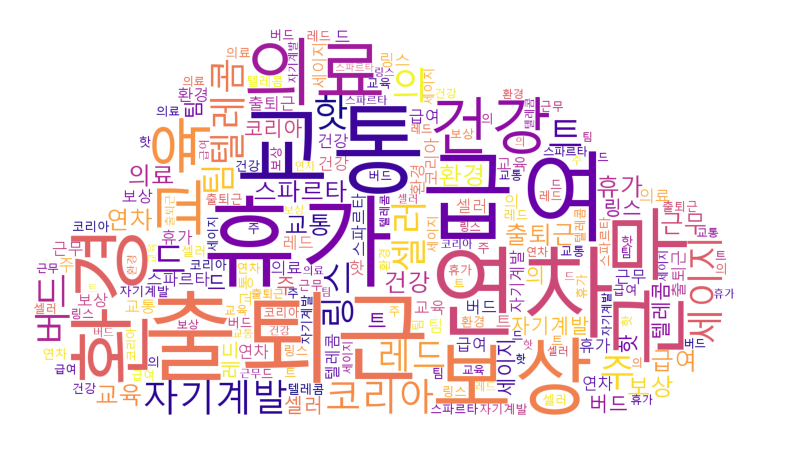

[('지원', 4802), ('및', 3416), ('휴가', 1042), ('비', 1012), ('근무', 871), ('제공', 851), ('운영', 786), ('제도', 699), ('본인', 690), ('선물', 685), ('경조사', 567), ('연차', 544), ('배우자', 501), ('무료', 404), ('건강검진', 385), ('출산', 368), ('수당', 367), ('사용', 365), ('차', 364), ('장기', 362), ('근속', 362), ('명절', 362), ('시간제', 349), ('향비', 347), ('간식', 343), ('음료', 342), ('포상', 342), ('금전', 336), ('유급', 322), ('도서', 318)]

{'휴가': 1042, '근무': 871, '제공': 851, '본인': 690, '선물': 685, '경조사': 567, '연차': 544, '배우자': 501, '무료': 404, '건강검진': 385, '출산': 368, '수당': 367, '차': 364, '장기': 362, '근속': 362, '명절': 362, '시간제': 349, '향비': 347, '간식': 343, '음료': 342, '포상': 342, '금전': 336, '유급': 322, '도서': 318}



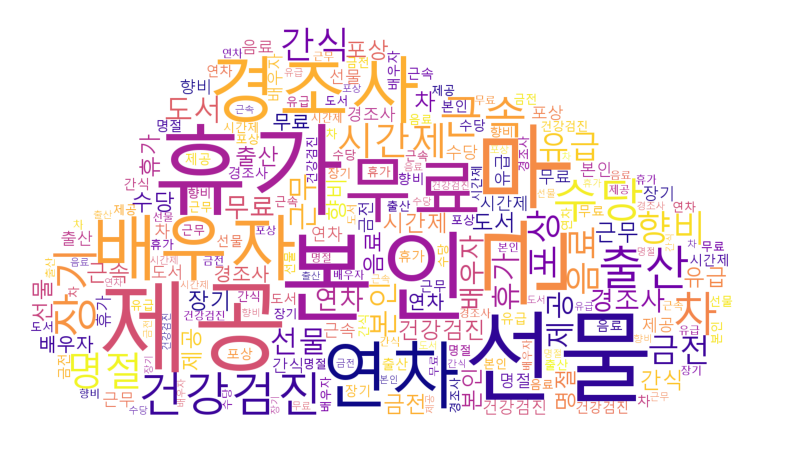

In [46]:
stopwords = ['지원', '특별한', '복지', '사용', '가능', '제도', '및', '비', '인', '브', '운영']

# category
title = '500개 기업의 카테고리'
name = 'category_500'
create_wordcloud(category, name, title, stopwords)

# benefit
title = '500개 기업의 복지 혜택'
name = 'benefit_500'
create_wordcloud(benefit, name, title, stopwords)

In [40]:
# 기업을 100개씩 5개의 그룹으로 나누기
top_100_df = data_df.loc[1:100, :]
top_200_df = data_df.loc[101:200, :]
top_300_df = data_df.loc[201:300, :]
top_400_df = data_df.loc[301:400, :]
top_500_df = data_df.loc[401:, :]
top_500_df

,기업 이름,총 만족도,평균 임금 (만원),복지 카테고리,복지 혜택
401,(주)레드블루,3.3,4327,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 명절 선물 및 귀향비 지원, 경조사 지원금, 자사 ..."
402,(주)모비루스,3.3,5278,"의료/건강, 지원 제도, 교통/출퇴근","건강검진 지원 (본인/배우자), 경조사 지원금, 명절 선물 및 귀향비 지원, 유류비..."
403,(주)모션아이,3.3,3324,"교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","재택 근무제도, 야간 교통비 지원, 절반 근무 및 문화 데이, 우수사원 금전포상, ..."
404,(주)미르이즈,3.3,4972,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 명절 선물 및 귀향비 지원, 사택/기숙사 운영 및 ..."
405,(주)쇼우테크,3.3,2866,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 명절 선물 및 귀향비 지원, 주차장 및 주차비 지원..."
...,...,...,...,...,...
496,(주)엘지씨엔에스,3.2,6107,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 상해/실손 보험 지원, 의료비 지원 (본인,가족),..."
497,(주)크라우드웍스,3.2,4451,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","의료비 지원 (본인,가족), 건강검진 지원 (본인/배우자), 상해/실손 보험 지원,..."
498,(주)티맥스티베로,3.2,5343,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경, 교육/자기계발","건강검진 지원 (본인/배우자), 체력단련비 지원, 의료비 지원 (본인,가족), 사내..."
499,바나플(유),3.2,4302,"의료/건강, 지원 제도, 교통/출퇴근, 급여/보상, 연차/휴가, 근무환경","건강검진 지원 (본인/배우자), 명절 선물 및 귀향비 지원, 자사 제품 직원 할인,..."


In [38]:
# 500개 기업 전체 평균 평점과 평균 임금
mean_level, mean_wage = data_df['총 만족도'].mean(), data_df['평균 임금 (만원)'].mean()
print(mean_level, mean_wage)

3.5375999999999994 4663.292


In [48]:
# 필요한 데이터 정리
mean_level_list = []
mean_wage_list = []

# total 500
mean_level, mean_wage = data_df['총 만족도'].mean(), data_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

# top_100
mean_level, mean_wage = top_100_df['총 만족도'].mean(), top_100_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

# top_200
mean_level, mean_wage = top_200_df['총 만족도'].mean(), top_200_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

# top_300
mean_level, mean_wage = top_300_df['총 만족도'].mean(), top_300_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

# top_400
mean_level, mean_wage = top_400_df['총 만족도'].mean(), top_400_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

# top_500
mean_level, mean_wage = top_500_df['총 만족도'].mean(), top_500_df['평균 임금 (만원)'].mean()
mean_level_list.append(mean_level)
mean_wage_list.append(mean_wage)

print(mean_level_list)
print(mean_wage_list)

[np.float64(3.5375999999999994), np.float64(4.068), np.float64(3.6420000000000003), np.float64(3.451999999999998), np.float64(3.3160000000000003), np.float64(3.2099999999999995)]
[np.float64(4663.292), np.float64(4939.61), np.float64(4581.7), np.float64(4692.05), np.float64(4617.18), np.float64(4485.92)]


In [95]:
# 막대를 그리는 함수

def draw_bar(y_data_1, y_data_2, label_list):
    
    # y_1 : 평균 평점, y_2: 평균 임금
    
    # 축을 2개 사용하고 싶음.
    fig, ax1 = plt.subplots(figsize=(7, 7))
    ax2 = ax1.twinx()
    
    width = 0.35
    x = np.arange(len(label_list))
    
    category = ['평균 평점도 (5점 만점)', '평균 임금 (만원)']

    bar1 = ax1.bar(x - width/2, y_data_1, width, color='#4B8A08')
    bar2 = ax2.bar(x + width/2, y_data_2, width, color='#0B3861')
    
    # bar에 값을 추가하기
    for bar in bar1:
        y_val = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/4.0, y_val, f'{y_val:.1f}', va='bottom', ha='center')
    for bar in bar2:
        y_val = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width(), y_val, f'{y_val:.2f}', va='bottom', ha='center')

            
    fig.suptitle('평균 평점과 평균 임금', fontsize=15)
    ax1.set_ylabel(category[0], fontsize=10, color='#4B8A08')
    ax2.set_ylabel(category[1], fontsize=10, color='#0B3861')
    ax1.set_xticks(np.arange(len(label_list)), label_list, rotation=-20)
    plt.savefig('mean_level_wage.jpg')
    plt.show()
    

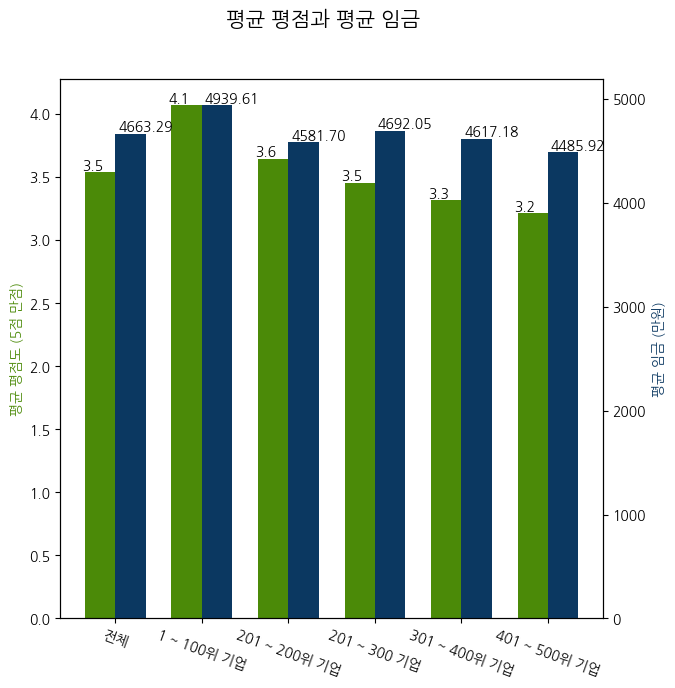

In [96]:
lavel_list = ['전체', '1 ~ 100위 기업', '201 ~ 200위 기업', '201 ~ 300 기업', '301 ~ 400위 기업', '401 ~ 500위 기업']
# mean_level_list와 mean_wage_list 사용
draw_bar(mean_level_list, mean_wage_list, lavel_list)

In [97]:
# 상위 100과 하위 100의 워드 클라우드

# 상위 100
high_category_df = top_100_df['복지 카테고리'].dropna()
high_category_list = high_category_df.to_list()
high_category = ', '.join(high_category_list)

high_benefit_df = top_100_df['복지 혜택'].dropna()
high_benefit_list = high_benefit_df.to_list()
high_benefit = ', '.join(high_benefit_list)

# 하위 100
low_category_df = top_500_df['복지 카테고리'].dropna()
low_category_list = low_category_df.to_list()
low_category = ', '.join(low_category_list)

low_benefit_df = top_500_df['복지 혜택'].dropna()
low_benefit_list = low_benefit_df.to_list()
low_benefit = ', '.join(low_benefit_list)

[('교통', 81), ('출퇴근', 81), ('지원', 77), ('제도', 77), ('의료', 73), ('건강', 73), ('급여', 73), ('보상', 73), ('연차', 73), ('휴가', 73), ('근무', 73), ('환경', 73), ('교육', 71), ('자기계발', 71), ('주', 8), ('특별한', 8), ('복지', 8), ('의', 3), ('텔레콤', 2), ('세이지', 1), ('핫', 1), ('셀러', 1), ('드', 1), ('버드', 1), ('코리아', 1), ('트', 1), ('레드', 1), ('링스', 1), ('팀', 1), ('스파르타', 1)]

{'교통': 81, '출퇴근': 81, '의료': 73, '건강': 73, '급여': 73, '보상': 73, '연차': 73, '휴가': 73, '근무': 73, '환경': 73, '교육': 71, '자기계발': 71, '텔레콤': 2, '세이지': 1, '핫': 1, '셀러': 1, '드': 1, '버드': 1, '코리아': 1, '트': 1, '레드': 1, '링스': 1, '팀': 1, '스파르타': 1}



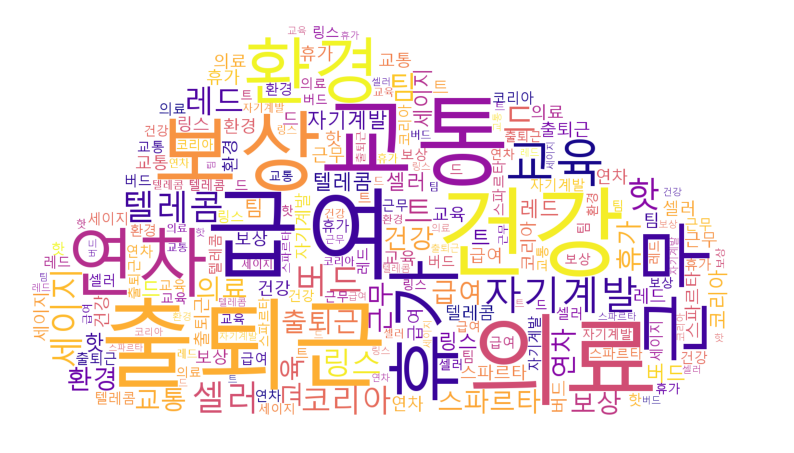

[('지원', 81), ('제도', 81), ('교통', 81), ('출퇴근', 81), ('급여', 79), ('보상', 79), ('근무', 76), ('환경', 76), ('연차', 75), ('휴가', 75), ('의료', 72), ('건강', 72), ('교육', 68), ('자기계발', 68), ('특별한', 10), ('복지', 10), ('주', 9), ('의', 2), ('슈리', 1), ('코리아', 1), ('유', 1), ('스푼', 1), ('라디오', 1), ('하이퍼', 1), ('커넥트', 1), ('푸드', 1), ('테크', 1), ('하이브로', 1), ('모비', 1), ('딥', 1)]

{'교통': 81, '출퇴근': 81, '급여': 79, '보상': 79, '근무': 76, '환경': 76, '연차': 75, '휴가': 75, '의료': 72, '건강': 72, '교육': 68, '자기계발': 68, '슈리': 1, '코리아': 1, '유': 1, '스푼': 1, '라디오': 1, '하이퍼': 1, '커넥트': 1, '푸드': 1, '테크': 1, '하이브로': 1, '모비': 1, '딥': 1}



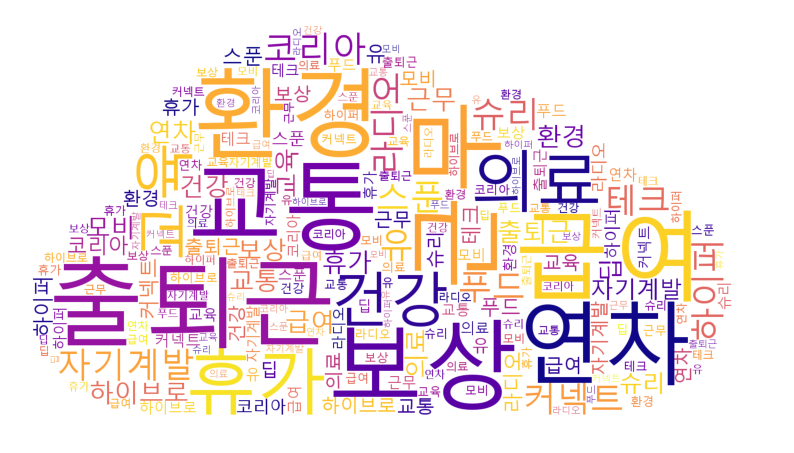

[('지원', 972), ('및', 666), ('비', 215), ('휴가', 206), ('근무', 188), ('제공', 164), ('운영', 163), ('제도', 148), ('본인', 141), ('선물', 127), ('경조사', 108), ('연차', 107), ('배우자', 100), ('출산', 79), ('유급', 78), ('건강검진', 77), ('사용', 75), ('무료', 74), ('무급', 73), ('차', 72), ('시간제', 69), ('지급', 65), ('도서', 65), ('장기', 65), ('근속', 65), ('재택', 64), ('자율', 63), ('구입', 63), ('명절', 63), ('탄력', 62)]

{'휴가': 206, '근무': 188, '제공': 164, '본인': 141, '선물': 127, '경조사': 108, '연차': 107, '배우자': 100, '출산': 79, '유급': 78, '건강검진': 77, '무료': 74, '무급': 73, '차': 72, '시간제': 69, '지급': 65, '도서': 65, '장기': 65, '근속': 65, '재택': 64, '자율': 63, '구입': 63, '명절': 63, '탄력': 62}



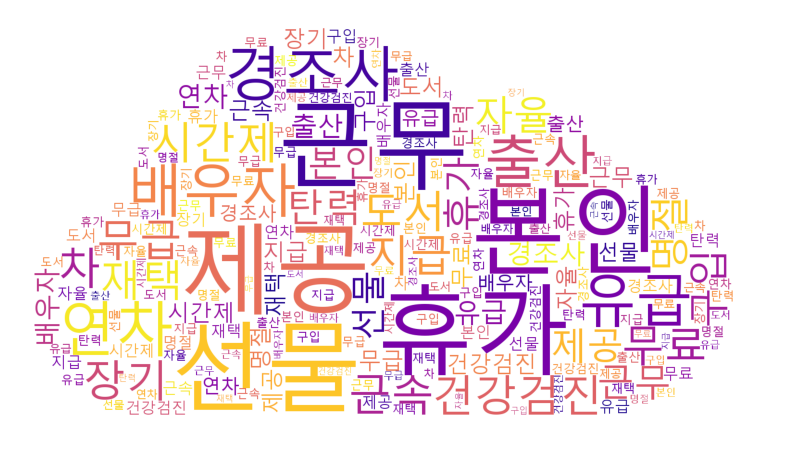

[('지원', 887), ('및', 652), ('휴가', 207), ('비', 185), ('근무', 166), ('제공', 153), ('선물', 134), ('운영', 132), ('본인', 130), ('제도', 129), ('경조사', 119), ('연차', 105), ('배우자', 98), ('무료', 78), ('건강검진', 77), ('명절', 74), ('사용', 74), ('수당', 74), ('차', 73), ('포상', 72), ('장기', 71), ('근속', 71), ('향비', 70), ('시간제', 69), ('금전', 69), ('출산', 69), ('간식', 66), ('음료', 66), ('원금', 63), ('도서', 61)]

{'휴가': 207, '근무': 166, '제공': 153, '선물': 134, '본인': 130, '경조사': 119, '연차': 105, '배우자': 98, '무료': 78, '건강검진': 77, '명절': 74, '수당': 74, '차': 73, '포상': 72, '장기': 71, '근속': 71, '향비': 70, '시간제': 69, '금전': 69, '출산': 69, '간식': 66, '음료': 66, '원금': 63, '도서': 61}



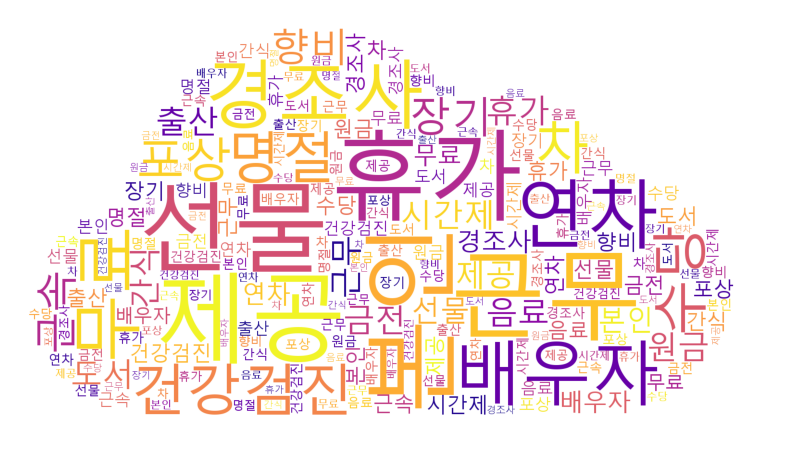

In [99]:
stopwords = ['지원', '특별한', '복지', '사용', '가능', '제도', '및', '비', '인', '브', '운영', '의', '주']

# category
title = '상위 100개 기업의 카테고리'
name = 'category_high_100'
create_wordcloud(high_category, name, title, stopwords)

title = '하위 100개 기업의 카테고리'
name = 'category_low_100'
create_wordcloud(low_category, name, title, stopwords)


# benefit
title = '상위 100개 기업의 복지 혜택'
name = 'benefit_high_100'
create_wordcloud(high_benefit, name, title, stopwords)

title = '하위 100개 기업의 복지 혜택'
name = 'benefit_low_100'
create_wordcloud(low_benefit, name, title, stopwords)